In [26]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [4]:
diabetes_df = pd.read_csv('diabetes.csv')

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
diabetes_df_copy = diabetes_df.copy
diabetes_df_copy=diabetes_df_copy(deep= True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']]=diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']].replace(0,np.NAN)


In [16]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


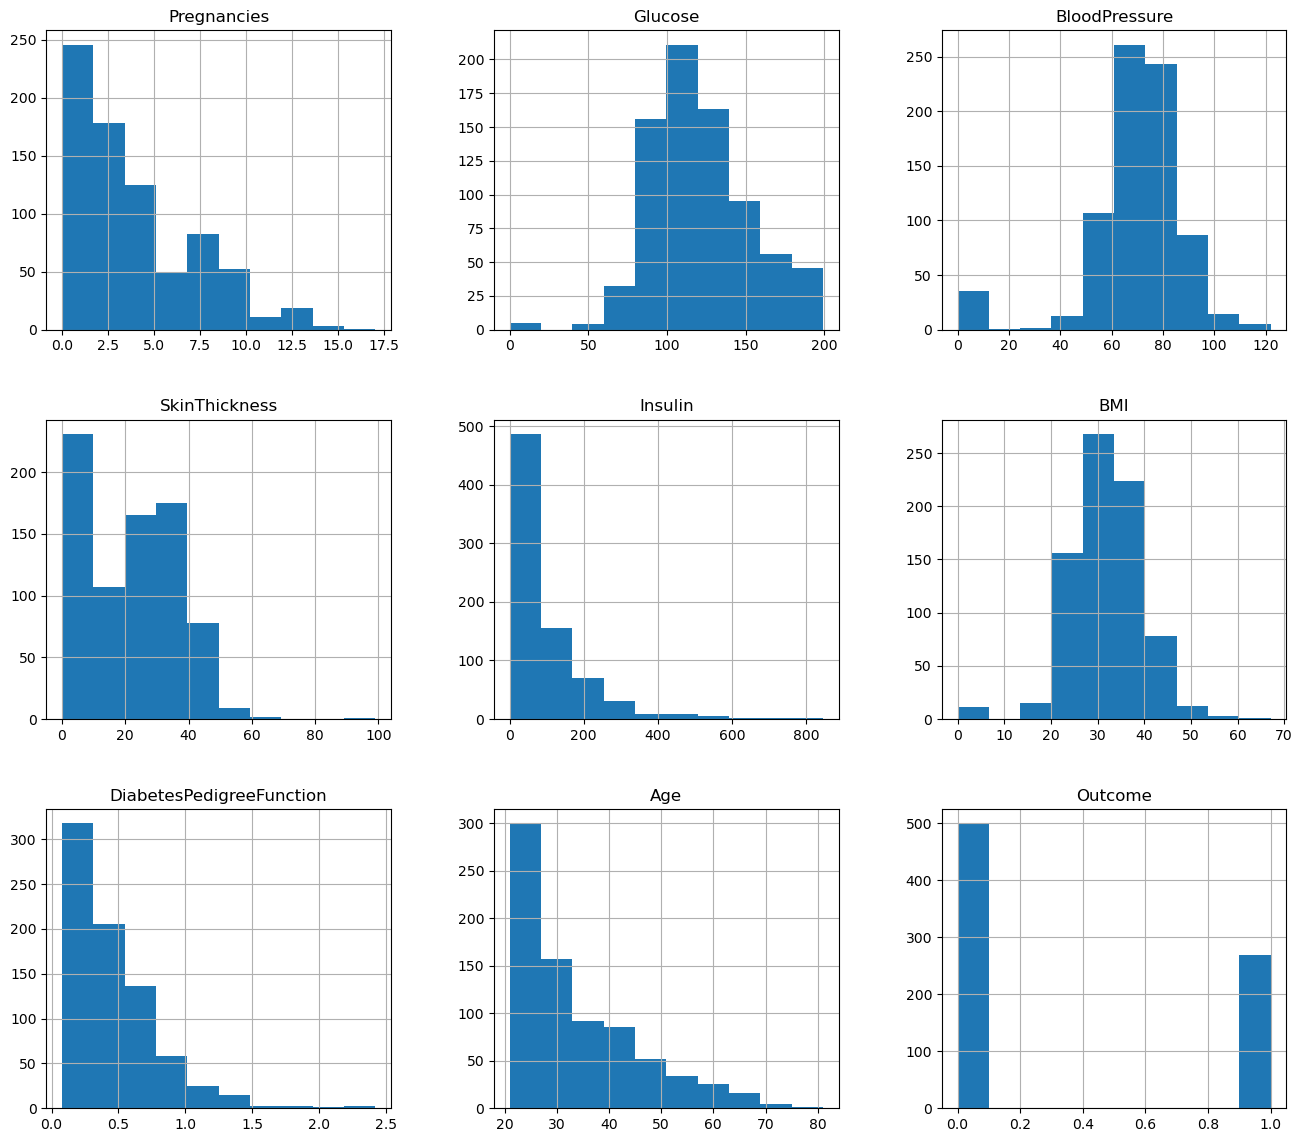

In [20]:
diabetes_df.hist(figsize=(16,14))
%matplotlib inline

In [21]:

diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace= True)

diabetes_df_copy['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace= True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace= True)
diabetes_df_copy['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace= True)
diabetes_df_copy['BMI'].fillna(diabetes_df['BMI'].median(), inplace= True)


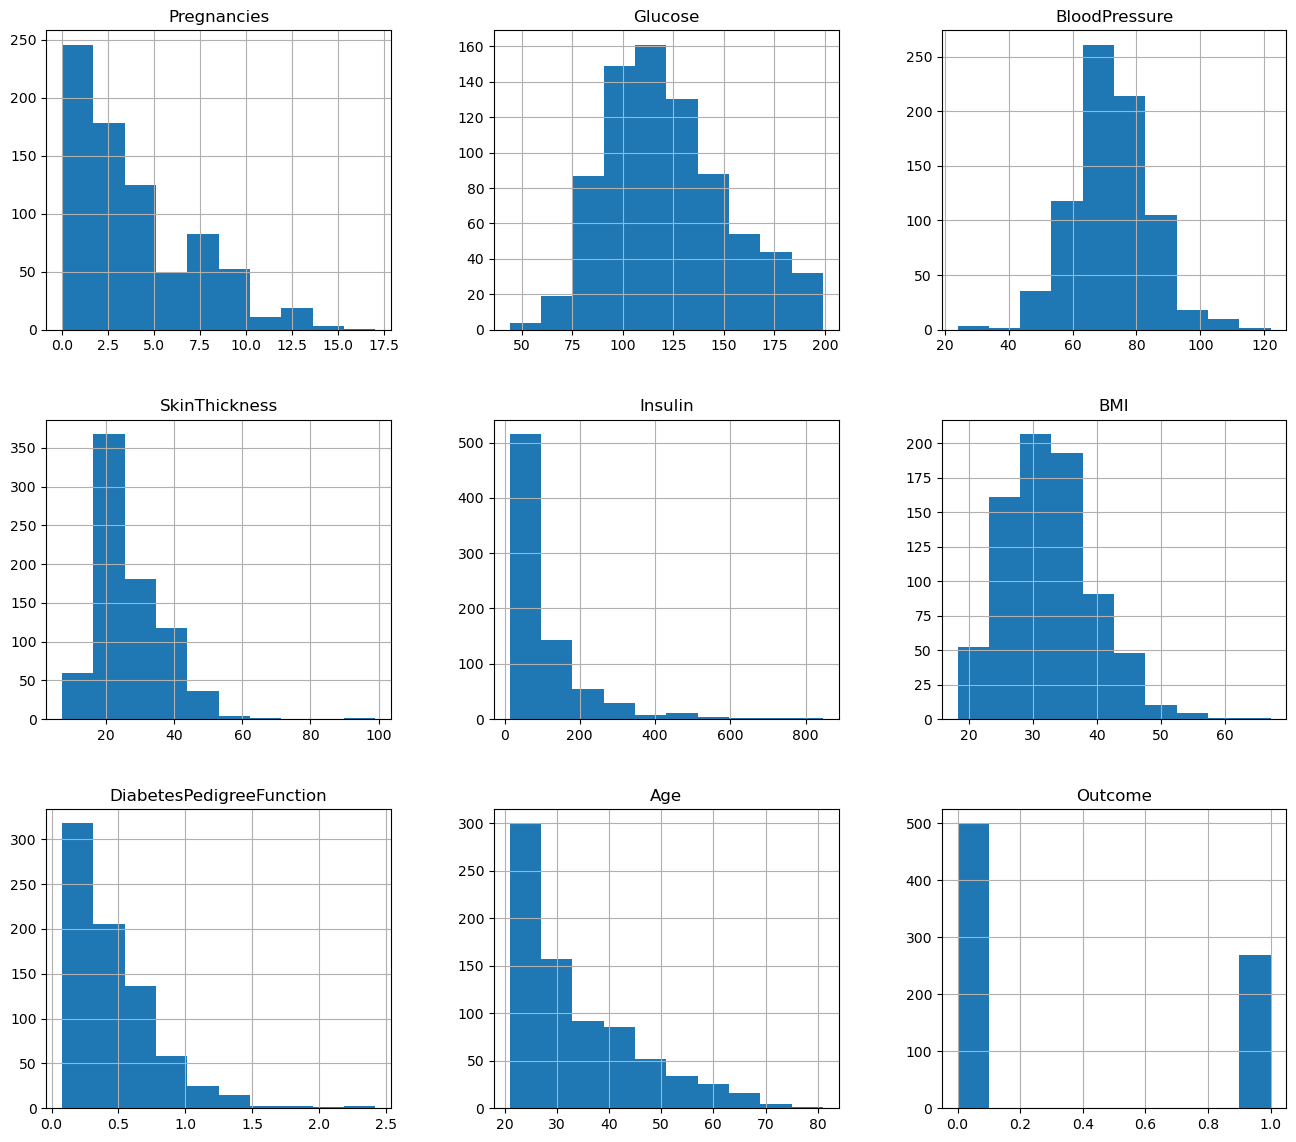

In [22]:
diabetes_df_copy.hist(figsize=(16,14))
%matplotlib inline

Outcome
0    500
1    268
Name: count, dtype: int64


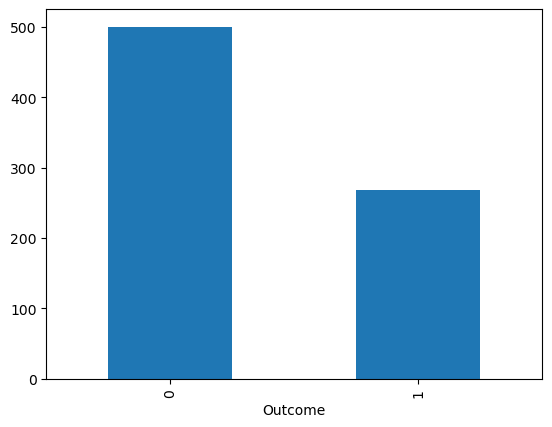

In [24]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel={1: "#0392cf", 2: "#7bc043"}

colors= diabetes_df["Outcome"].map(lambda x:color_wheel.get(x+1))
print(diabetes_df.Outcome.value_counts())

p = diabetes_df.Outcome.value_counts().plot(kind="bar")


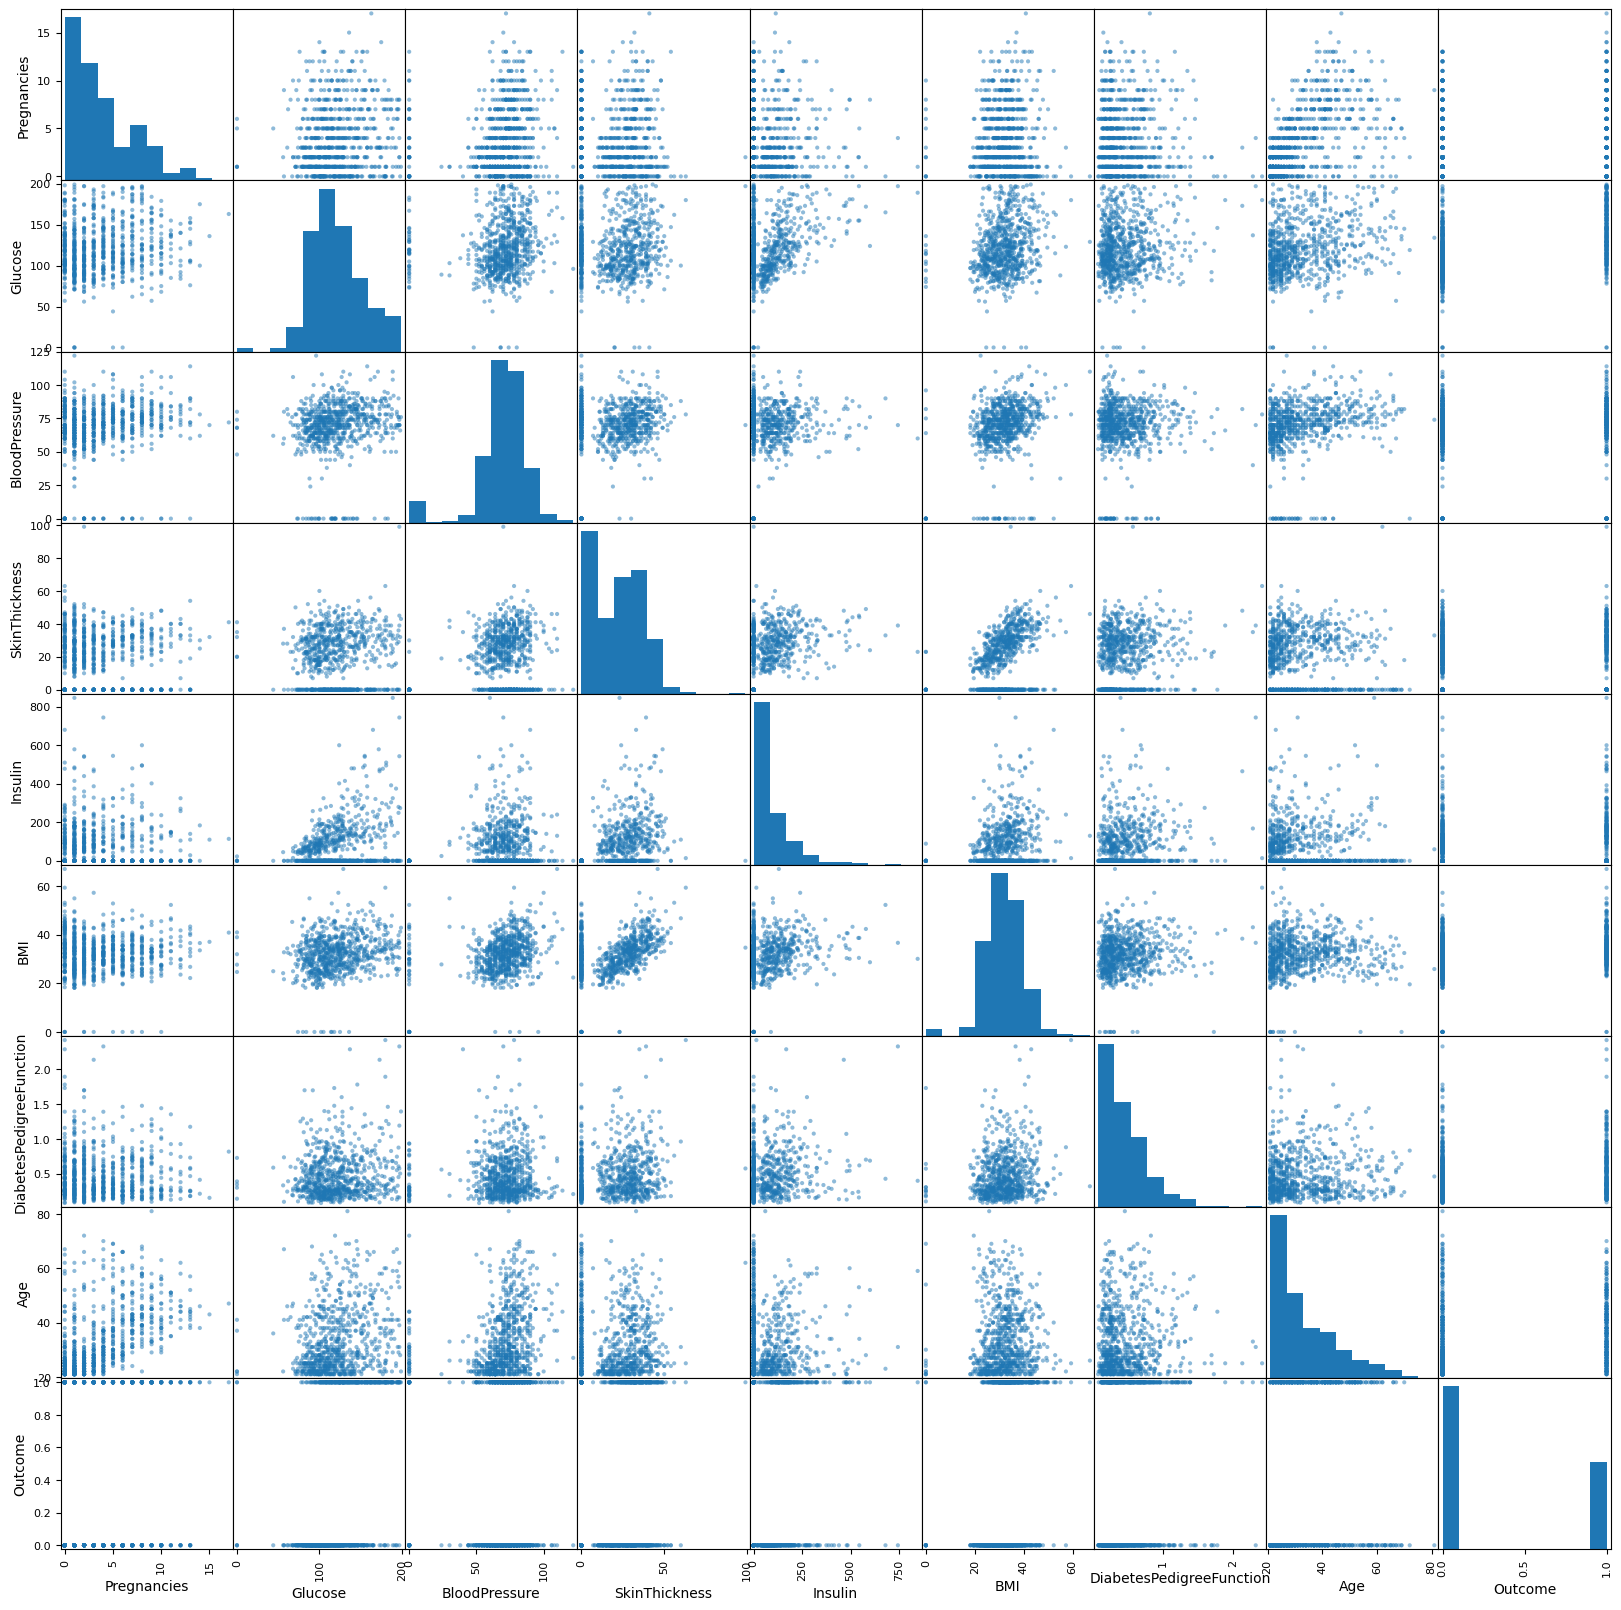

In [28]:
p = scatter_matrix(diabetes_df, figsize=(20,20))

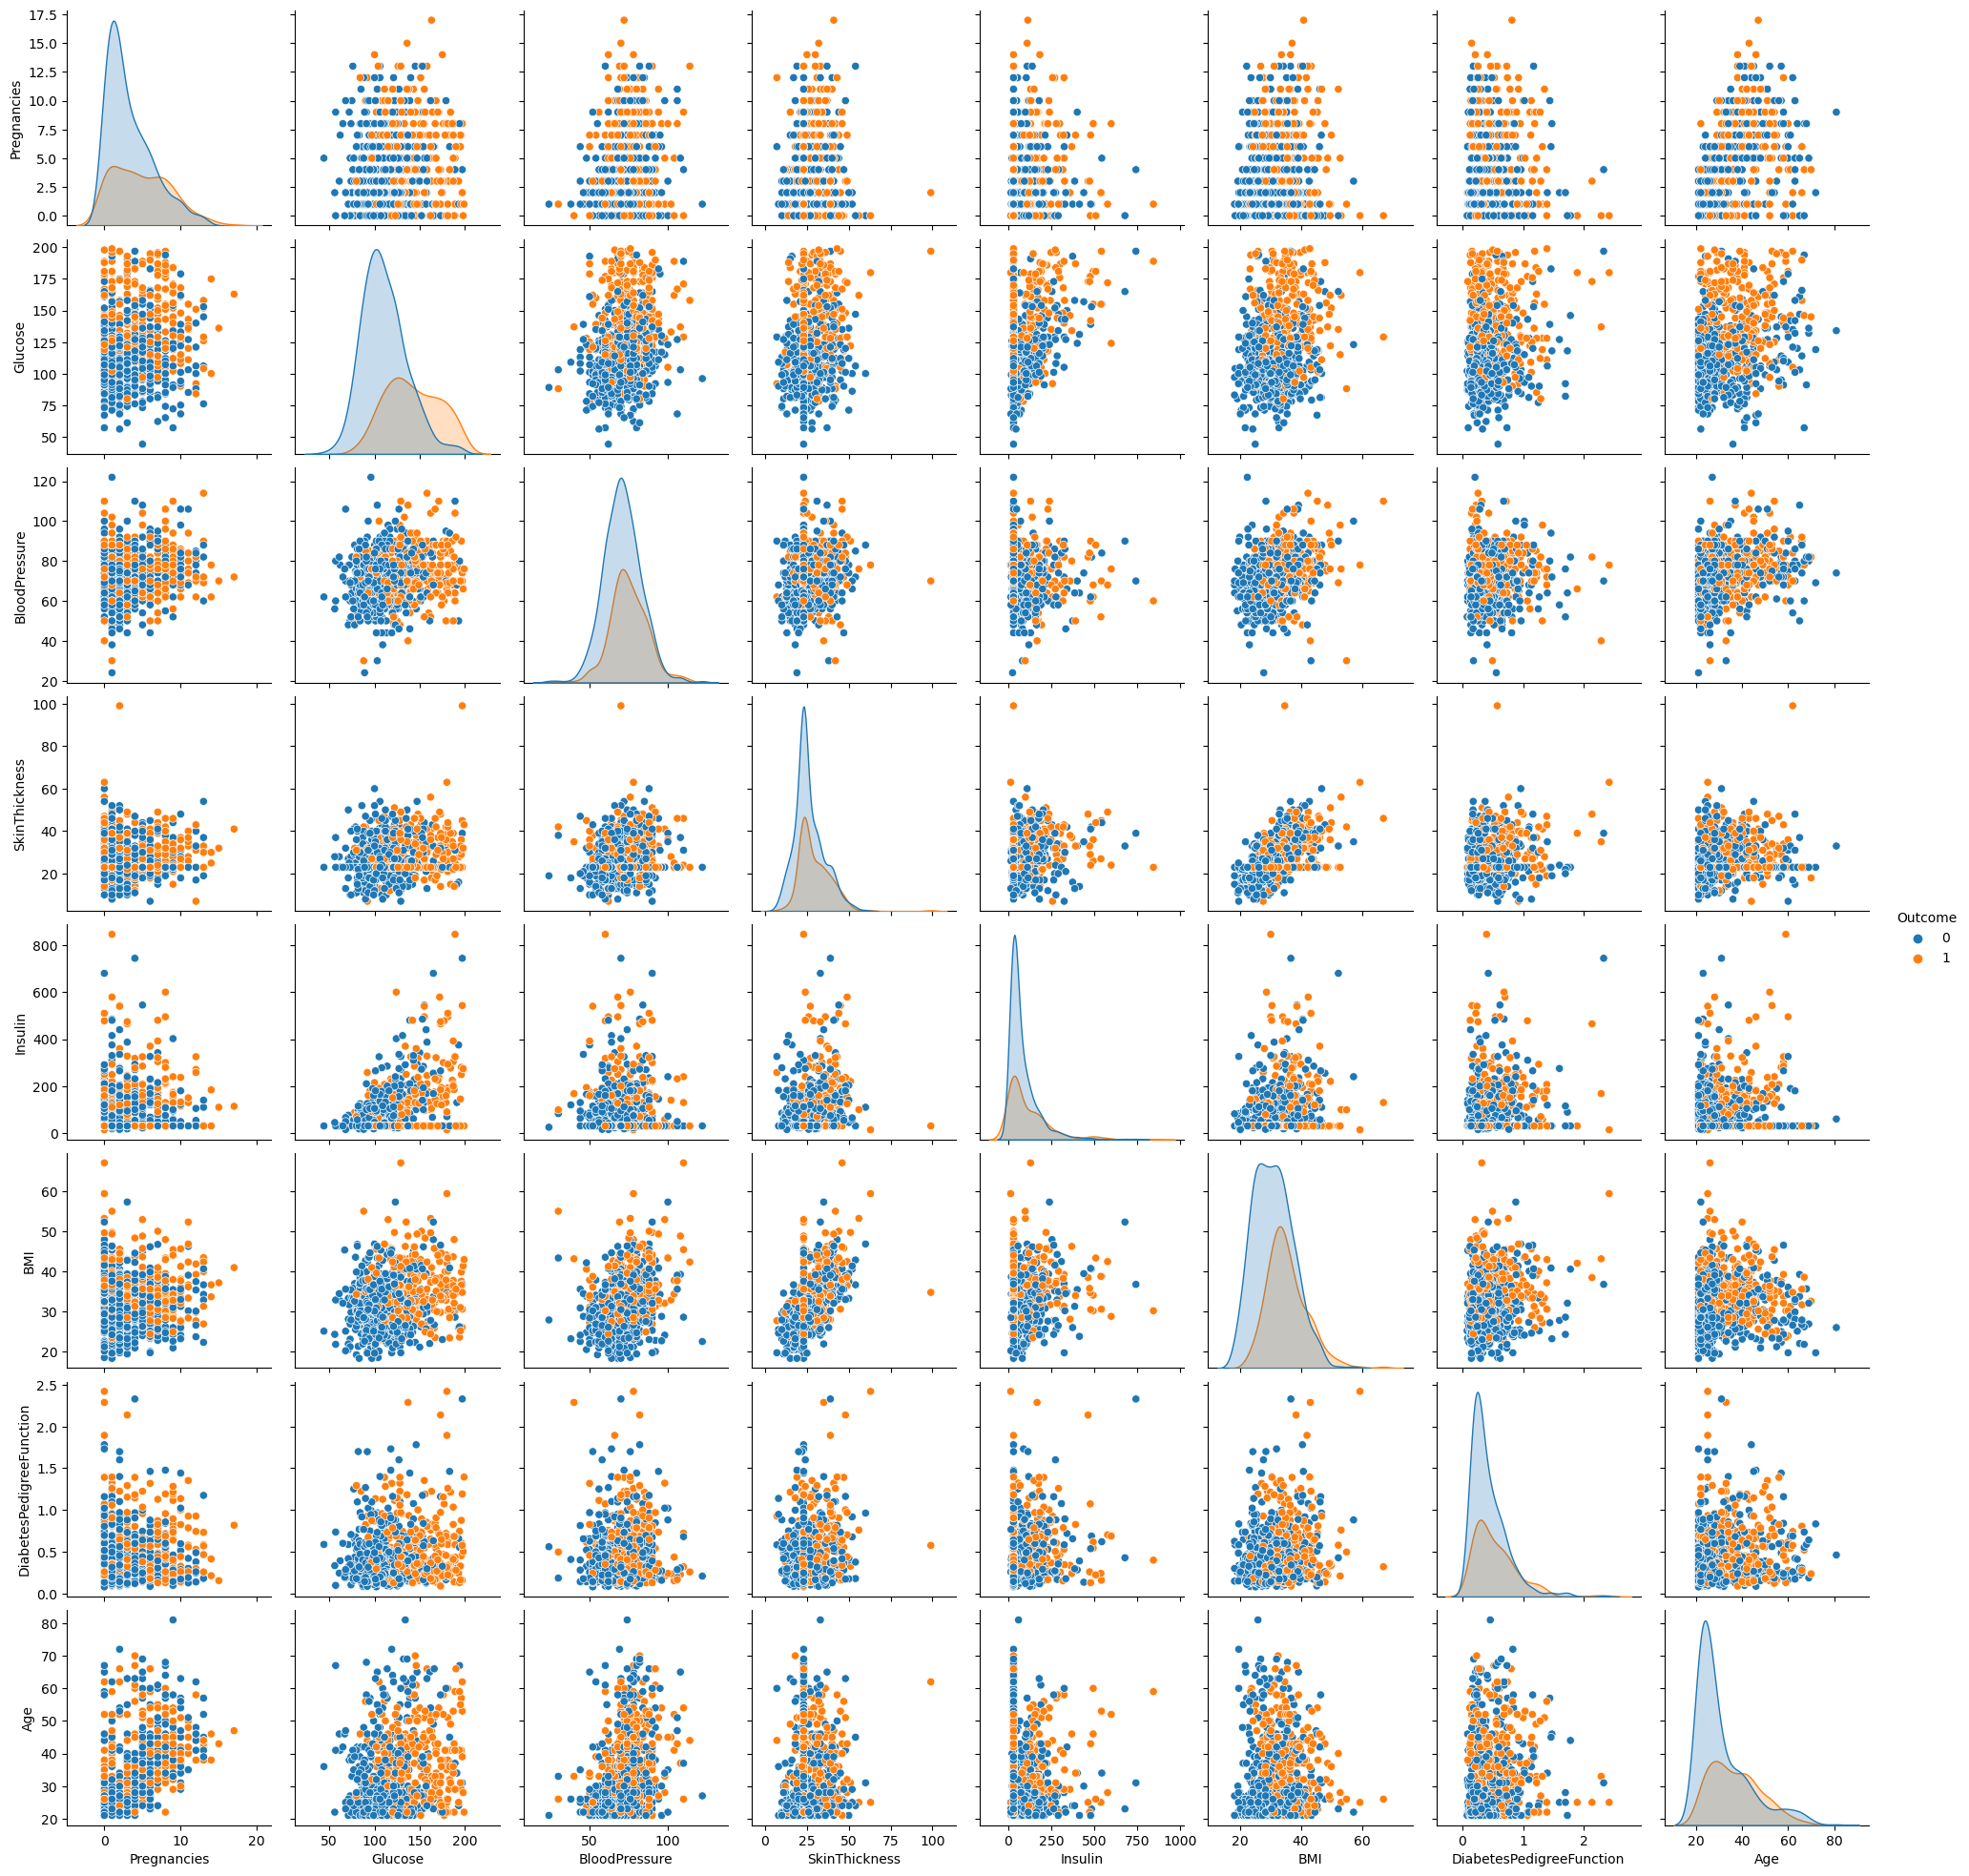

In [30]:
sns.pairplot(diabetes_df_copy, hue='Outcome')
plt.show()

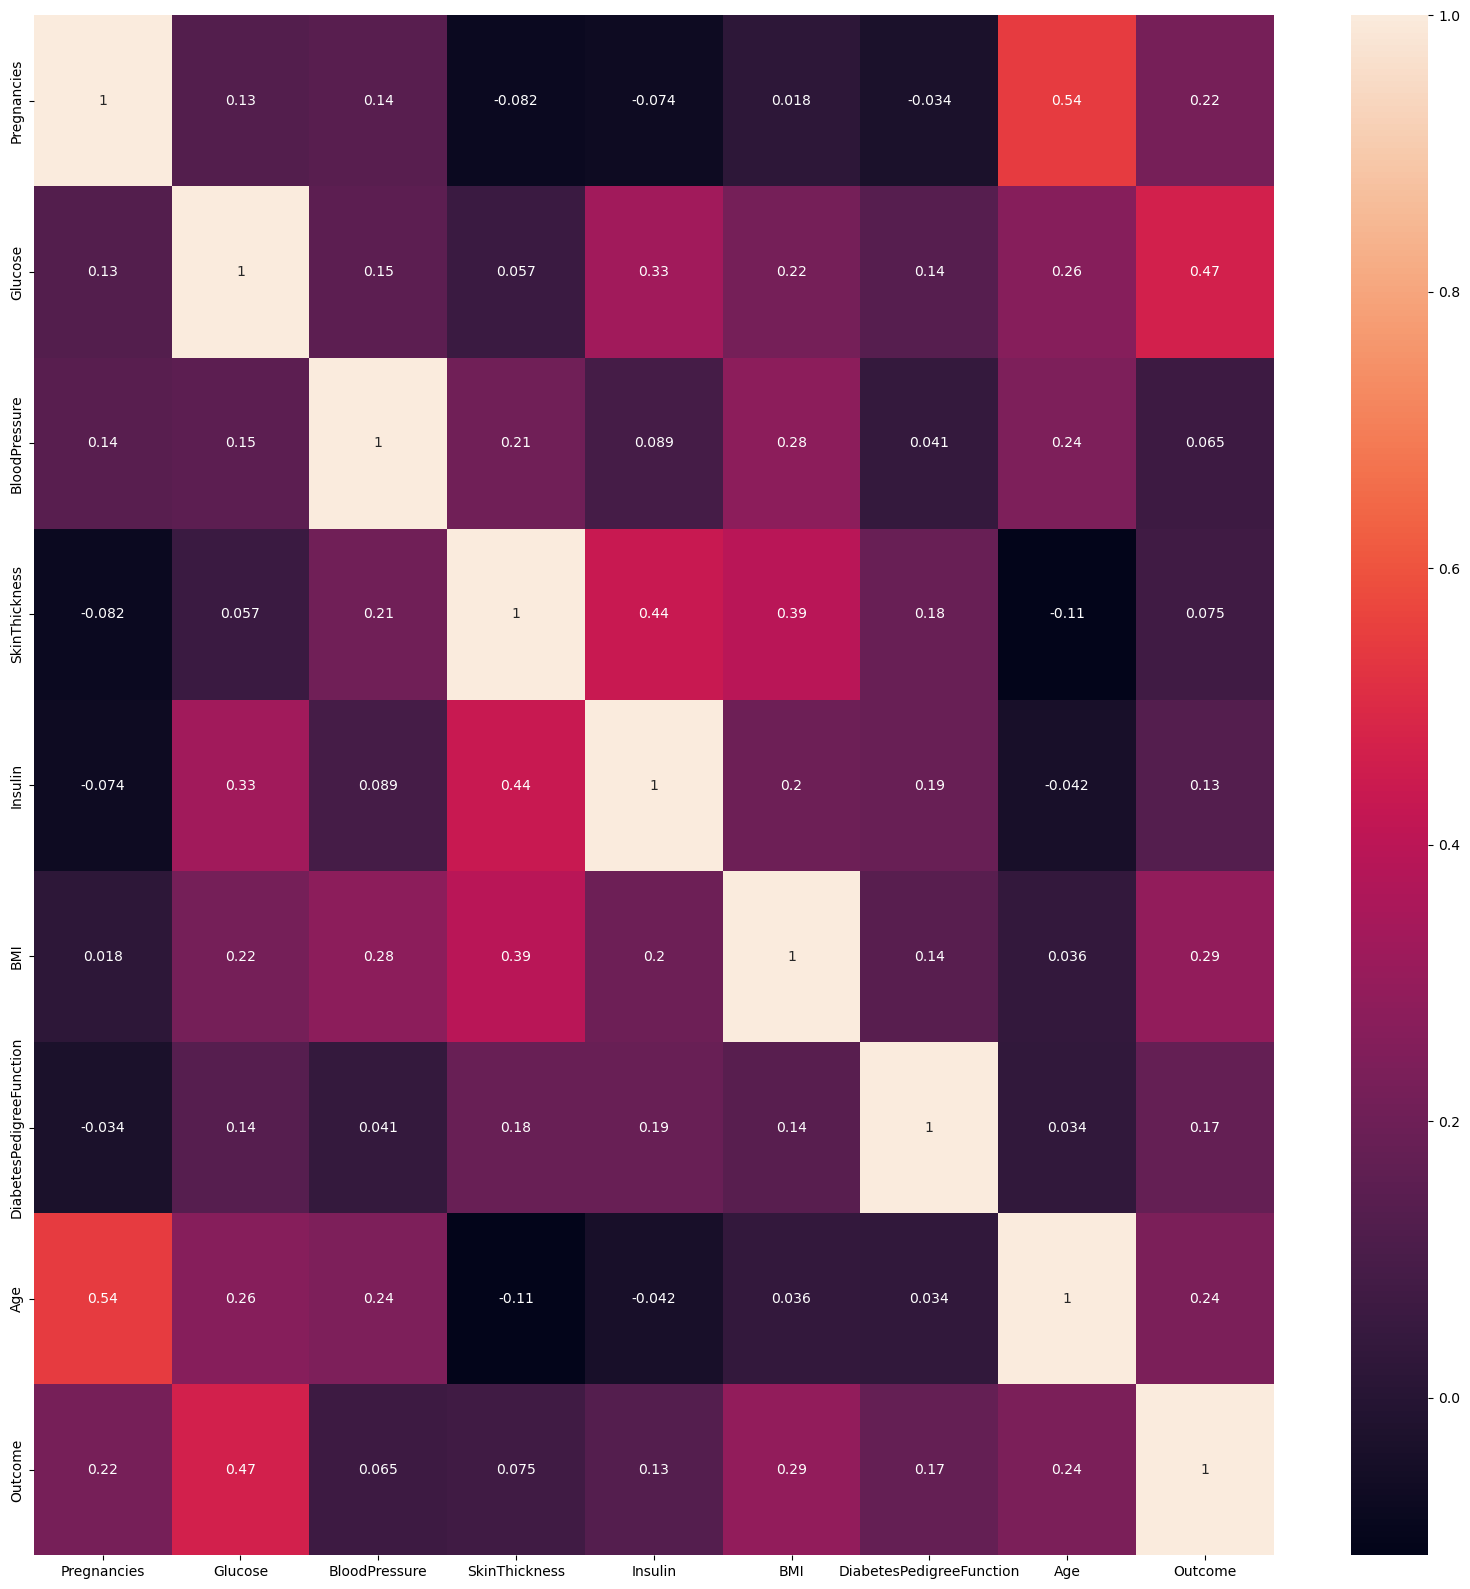

In [32]:
plt.figure(figsize=(20,20))
p = sns.heatmap(diabetes_df.corr(), annot=True)

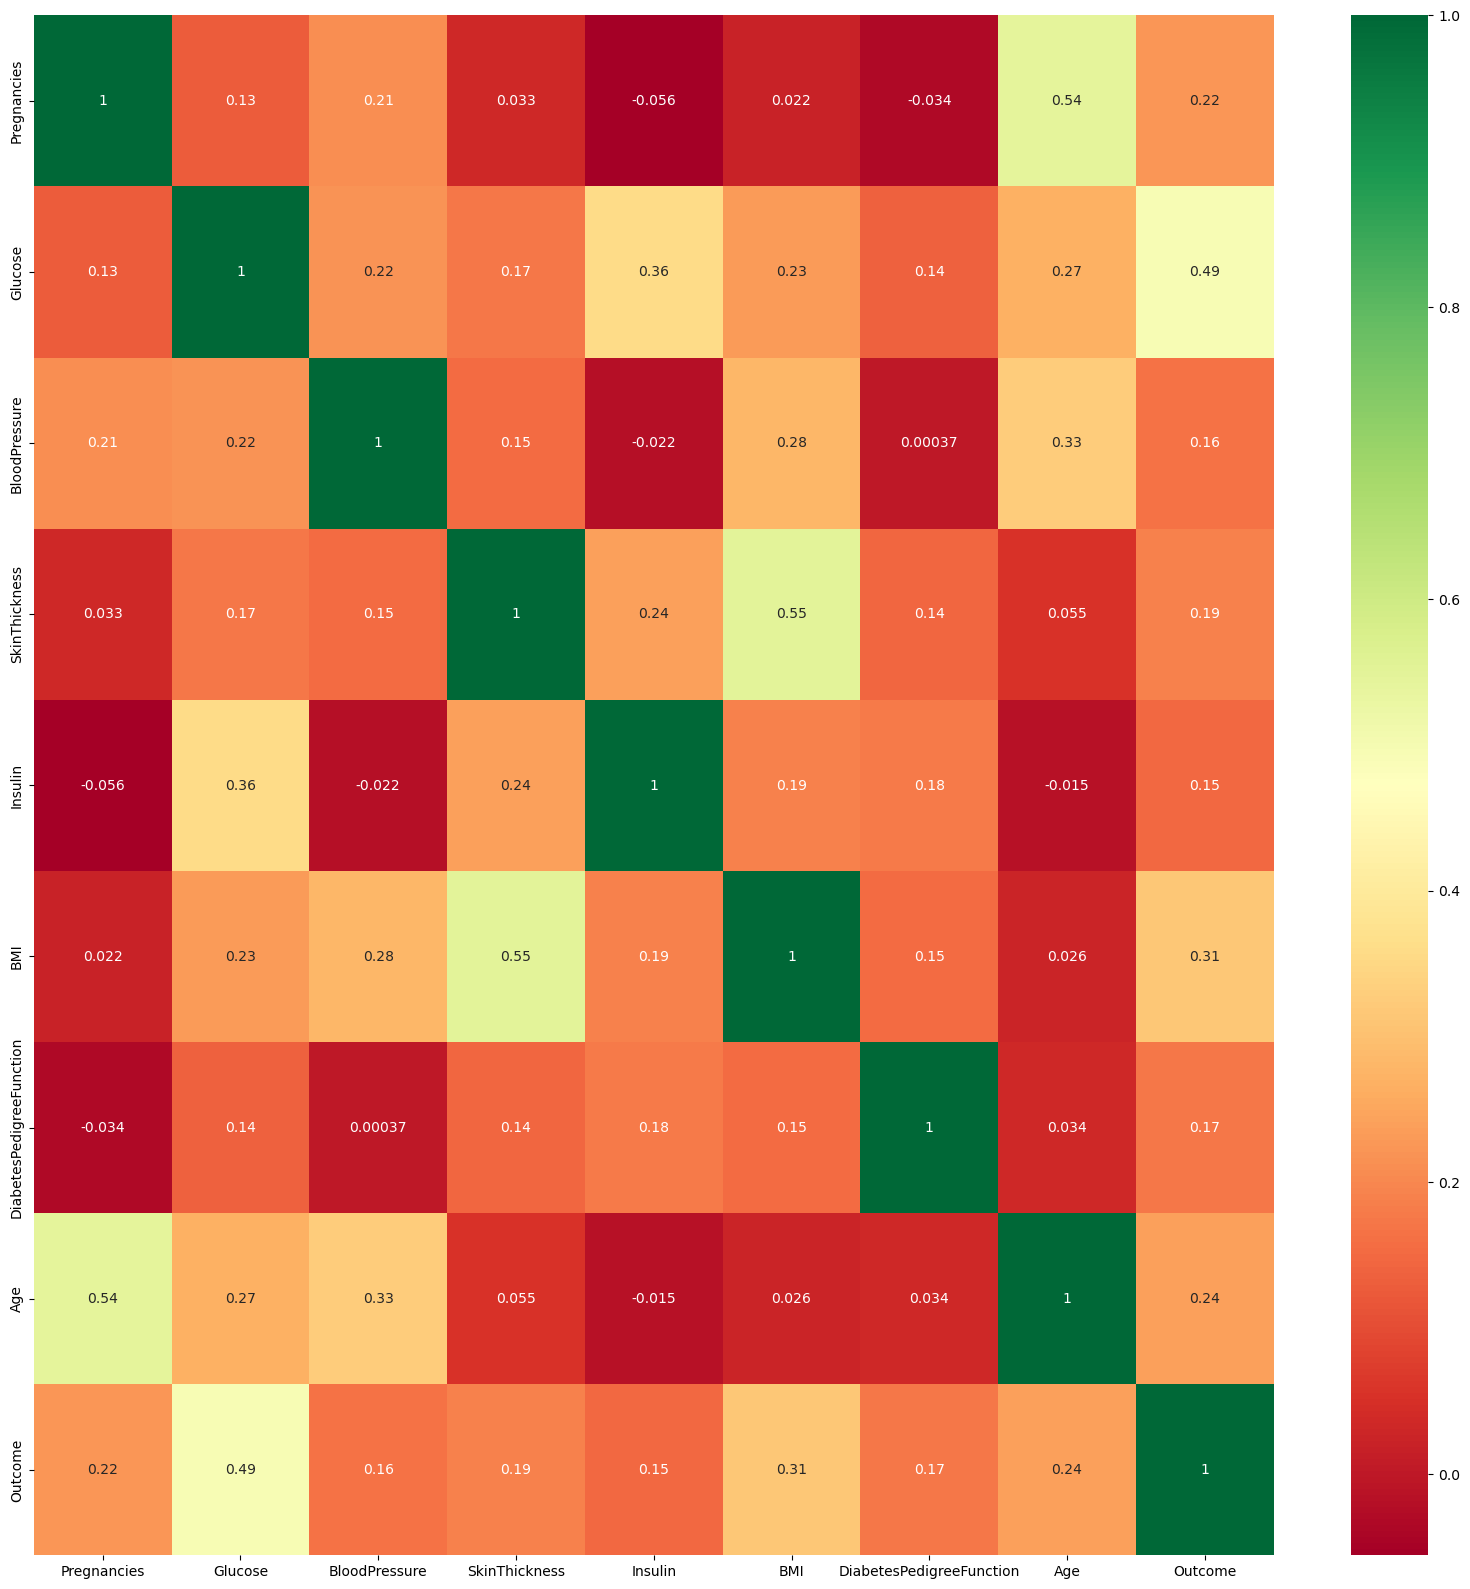

In [35]:
plt.figure(figsize=(20,20))
p = sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='RdYlGn')

NameError: name 'diabetis_df' is not defined

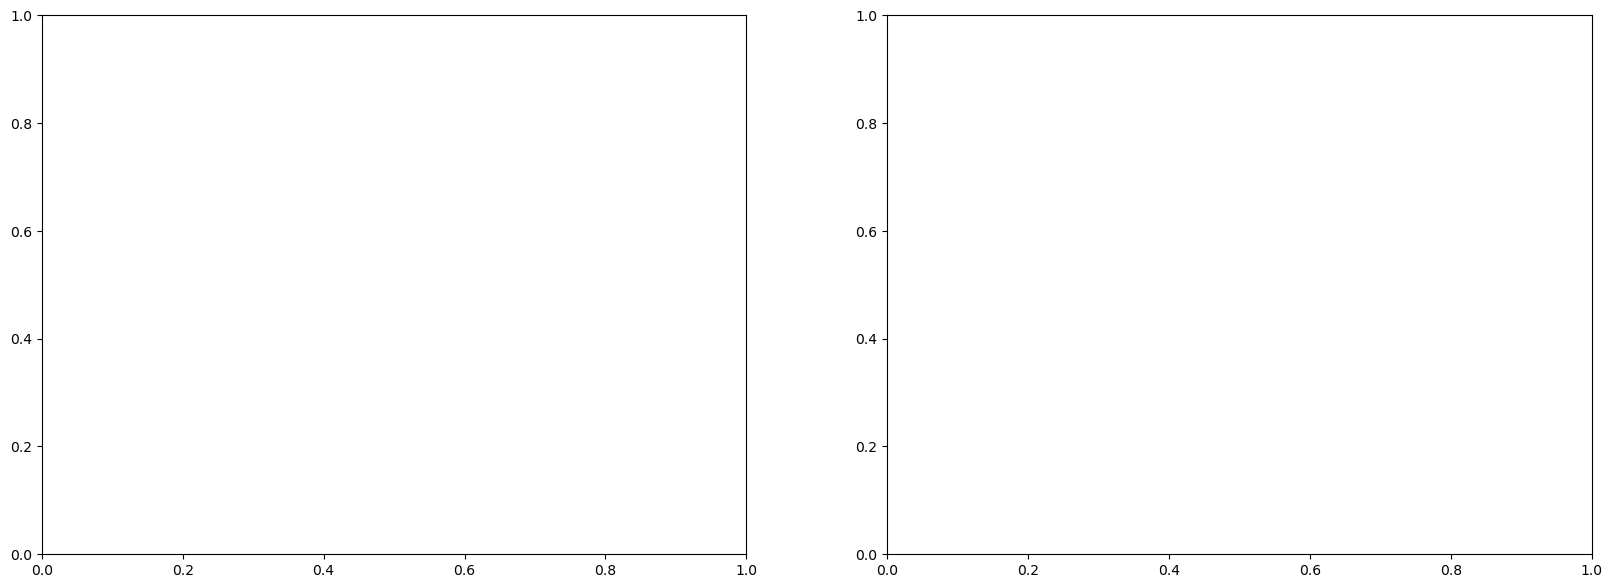

In [38]:
fig, ax = plt.subplots (1,2, figsize=(20,7))

sns.countplot(data = diabetis_df, x = "Outcome", ax = ax[0])
diabetis_df["Outcome"].value_counts().plot.pie(explode= [0.1,0], autopct= "%1.1f%%", labels=["No", "YES"], shadow= True,ax=ax[1])

plt.show()
